# 1. Word Cloud and Word Frequency
### IMPORTANT : The collected reviews and ratings range from Dec 2017 till January 2024

In [4]:
#Libraries required for data importing and data manupulation
import numpy as np
import pandas as pd
import re
#Libraries for preprocessing text data
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

#Libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

#Library for creating word cloud
from wordcloud import WordCloud

In [48]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))
# stop_words.remove('not')
stop_words.update(["ba","flight","British","BA","british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would","london","b","u"])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Swamesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Swamesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Swamesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
df_reviews = pd.read_csv('Recent_data_collected/BA_reviews_uncleaned.csv')

In [93]:
df_reviews.head()

,Review,Overall_rating,Type Of Traveller,Seat Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Date,verified
0,✅ Trip Verified | First time using BA busines...,9,Couple Leisure,Business Class,London to New York,5.0,5.0,5.0,5.0,NaN,4,yes,2024-01-07,True
1,Not Verified | Extremely rude ground service....,6,Family Leisure,Economy Class,Rome to London,4.0,5.0,4.0,1.0,NaN,2,no,2024-01-03,False
2,✅ Trip Verified | My son and I flew to Geneva...,1,Family Leisure,Business Class,Gatwick to Geneva,2.0,1.0,1.0,1.0,1.0,1,no,2024-01-02,True
3,✅ Trip Verified | For the price paid (bought ...,8,Solo Leisure,Business Class,Istanbul to London Heathrow,1.0,4.0,5.0,2.0,NaN,4,yes,2023-12-29,True
4,✅ Trip Verified | Flight left on time and arr...,6,Solo Leisure,Economy Class,London Heathrow to Istanbul,3.0,2.0,1.0,5.0,NaN,2,no,2023-12-29,True


## To maintain genuineness , we will consider only verified reviews

In [94]:
df_verified_reviews = df_reviews.loc[df_reviews['verified']== True]

In [95]:
df_verified_reviews.head(3)

,Review,Overall_rating,Type Of Traveller,Seat Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Date,verified
0,✅ Trip Verified | First time using BA busines...,9,Couple Leisure,Business Class,London to New York,5.0,5.0,5.0,5.0,NaN,4,yes,2024-01-07,True
2,✅ Trip Verified | My son and I flew to Geneva...,1,Family Leisure,Business Class,Gatwick to Geneva,2.0,1.0,1.0,1.0,1.0,1,no,2024-01-02,True
3,✅ Trip Verified | For the price paid (bought ...,8,Solo Leisure,Business Class,Istanbul to London Heathrow,1.0,4.0,5.0,2.0,NaN,4,yes,2023-12-29,True


* __We don't need columns like Traveller type,Date,Route and all other ratings__

In [96]:
df_verified_reviews = df_verified_reviews.drop(['Type Of Traveller','Route','Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Ground Service', 'Wifi & Connectivity', 'Value For Money','Date'],axis=1)

In [97]:
df_verified_reviews['Review'] = df_verified_reviews['Review'].str.split('|',expand=True)[1]

In [98]:
df_verified_reviews.head()

,Review,Overall_rating,Seat Type,Recommended,verified
0,First time using BA business class but we we...,9,Business Class,yes,True
2,My son and I flew to Geneva last Sunday for ...,1,Business Class,no,True
3,For the price paid (bought during a sale) it...,8,Business Class,yes,True
4,Flight left on time and arrived over half an...,6,Economy Class,no,True
5,"Very Poor Business class product, BA is not ...",2,Business Class,no,True


In [99]:
df_verified_reviews.isnull().sum()

Review            0
Overall_rating    0
Seat Type         0
Recommended       0
verified          0
dtype: int64

In [100]:
def preprocess(text):
    # Convert the text to lowercase
    text = text.lower()

    # Remove non-letter characters
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Tokenize the text
    words = word_tokenize(text)

    # Lemmatize the words and remove stop words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    words = " ".join(words)

    return words

In [101]:
df_verified_reviews['Review_processed'] = df_verified_reviews['Review'].apply(preprocess)

In [102]:
df_verified_reviews

,Review,Overall_rating,Seat Type,Recommended,verified,Review_processed
0,First time using BA business class but we we...,9,Business Class,yes,True,first time using business class pleased servic...
2,My son and I flew to Geneva last Sunday for ...,1,Business Class,no,True,son flew geneva last sunday skiing holiday le ...
3,For the price paid (bought during a sale) it...,8,Business Class,yes,True,price paid bought sale decent experience altho...
4,Flight left on time and arrived over half an...,6,Economy Class,no,True,left time arrived half hour earlier scheduled ...
5,"Very Poor Business class product, BA is not ...",2,Business Class,no,True,poor business class product close leader ever ...
...,...,...,...,...,...,...
1365,London to Tel Aviv. I have been waiting on ...,1,Business Class,no,True,tel aviv waiting luggage five day trip thanks ...
1366,I flew Premium Economy from London to Cape To...,3,Premium Economy,no,True,flew premium economy cape town airway flown pr...
1367,Hong Kong to London before Christmas in Firs...,9,First Class,yes,True,hong kong christmas first class boarding littl...
1368,Dublin to Heathrow. BA gets worse and worse ...,1,Business Class,no,True,dublin get worse worse worse today special tho...


In [48]:
all_reviews = ' '.join(df_verified_reviews['Review_processed'])

In [49]:
all_reviews

'first time using business class pleased service received one waiting check bag drop security minute used lounge gate area found quiet plenty food drink offer boarding quick cabin x x layout seat although larger c cabin behind seat food drink plenty full good quality service cabin crew excellent cabin manager lauren made birthday card found wife special birthday departed early arrived jfk early well thing disliked paying select seat free wi fi son flew geneva last sunday skiing holiday le arc cancelled moment prior boarding transferred departing three half hour later got delayed three hour load food forgot load baggage business class passenger earlier problem happen complex operation totally unacceptable service one receives problem offshore call centre unhelpful obstructive wanting fob issue getting customer call special help line merely refer one webpage cut web page often unable give information updated often refuse update input time please try later access people willing help empow

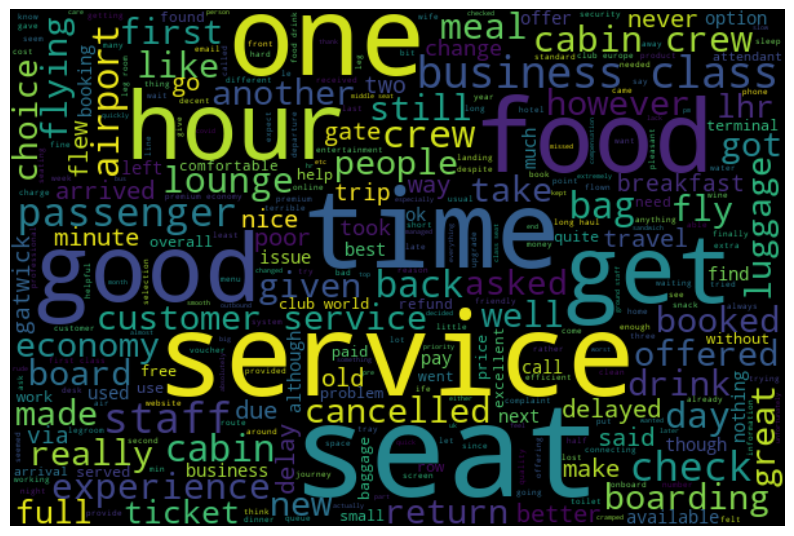

In [50]:
wordcloud = WordCloud(width=600, 
                     height=400,
                      max_words=300, 
                     max_font_size=100,stopwords=stop_words).generate(all_reviews)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

### Insight :
* Words like seat, service, good,food,time,cabin crew and business class have been popular.
* There are words like poor, cancelled, problem , delayed which indidicate some issues

### Frequency of words

In [51]:
#Creating frequency distribution using the lematized words
words = nltk.word_tokenize(all_reviews)
fd = FreqDist(words)


* __Top 20 words__

In [52]:

top_15 = fd.most_common(20)

fdist = pd.Series(dict(top_15))

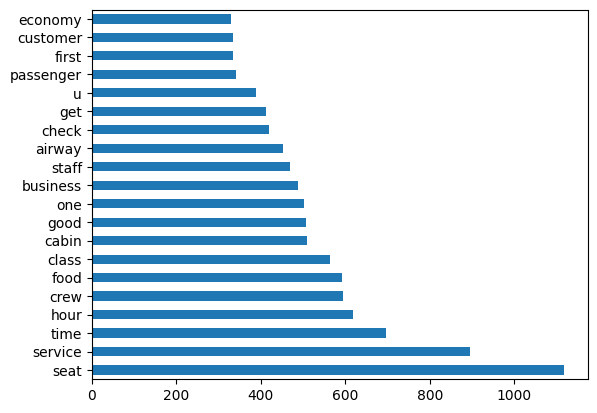

In [53]:
fdist.plot(kind='barh')
plt.show()

### Insight:

* __This gives us a glimpse of what customers are really talking about here. We see that Seat is most talked about the airline followed by "Service", "time" and "crew" which are all very important to customers in terms of service. However, we still do not know is how they are expressing about each of this service. To bring some significane to these terms we will use ngram plots to see if they are bad or good in experience__



__-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

# 2. Sentiment Analysis

* ## Using Vader

In [103]:
df_reviews = df_verified_reviews.copy()

In [104]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Swamesh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [105]:
df_reviews.head(3)

,Review,Overall_rating,Seat Type,Recommended,verified,Review_processed
0,First time using BA business class but we we...,9,Business Class,yes,True,first time using business class pleased servic...
2,My son and I flew to Geneva last Sunday for ...,1,Business Class,no,True,son flew geneva last sunday skiing holiday le ...
3,For the price paid (bought during a sale) it...,8,Business Class,yes,True,price paid bought sale decent experience altho...


In [106]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
vds = SentimentIntensityAnalyzer()

In [125]:
df_reviews['Sentiment_vader'] = 'Sentiment'
for i in df_reviews.index:
    
    score = vds.polarity_scores(df_reviews.loc[i, 'Review_processed'])['compound']
    
    if score > 0.2:
        df_reviews.loc[i, 'Sentiment_vader'] = 'Positive'
        
    elif score < -0.2:
        df_reviews.loc[i, 'Sentiment_vader'] = 'Negative'
        
    else:
        df_reviews.loc[i, 'Sentiment_vader'] = 'Neutral'


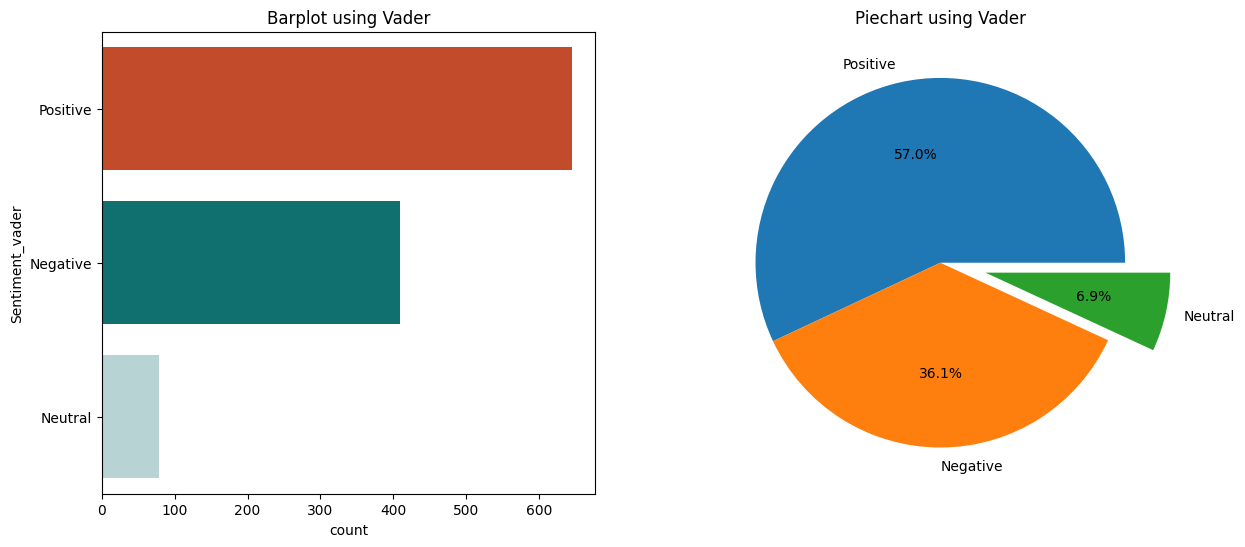

In [127]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Countplot
sns.countplot(y='Sentiment_vader', 
              data=df_reviews, 
              palette=['#db3d13',"#008080", '#b2d8d8'],
              ax=ax[0])
ax[0].set_title('Barplot using Vader')

# Pie chart
ax[1].pie(df_reviews['Sentiment_vader'].value_counts().values, 
          labels = df_reviews['Sentiment_vader'].value_counts().index, 
          explode = (0, 0, 0.25), 
          autopct='%1.1f%%', 
          shadow=False)
ax[1].set_title('Piechart using Vader')

plt.show()

* ## Using TextBlob

In [109]:
from textblob import TextBlob

In [123]:
df_reviews['Sentiment_blob'] = 'Sentiment'
for i in df_reviews.index:
    
    # Create a TextBlob object
    blob = TextBlob(df_reviews.loc[i, 'Review_processed'])
    
    # Get the polarity of the text
    score = blob.sentiment.polarity
    
    if score > 0.2:
        df_reviews.loc[i,'Sentiment_blob'] = 'Positive'
        
    elif score < -0.2:
        df_reviews.loc[i,'Sentiment_blob'] = 'Negative'
        
    else:
        df_reviews.loc[i,'Sentiment_blob'] = 'Neutral'

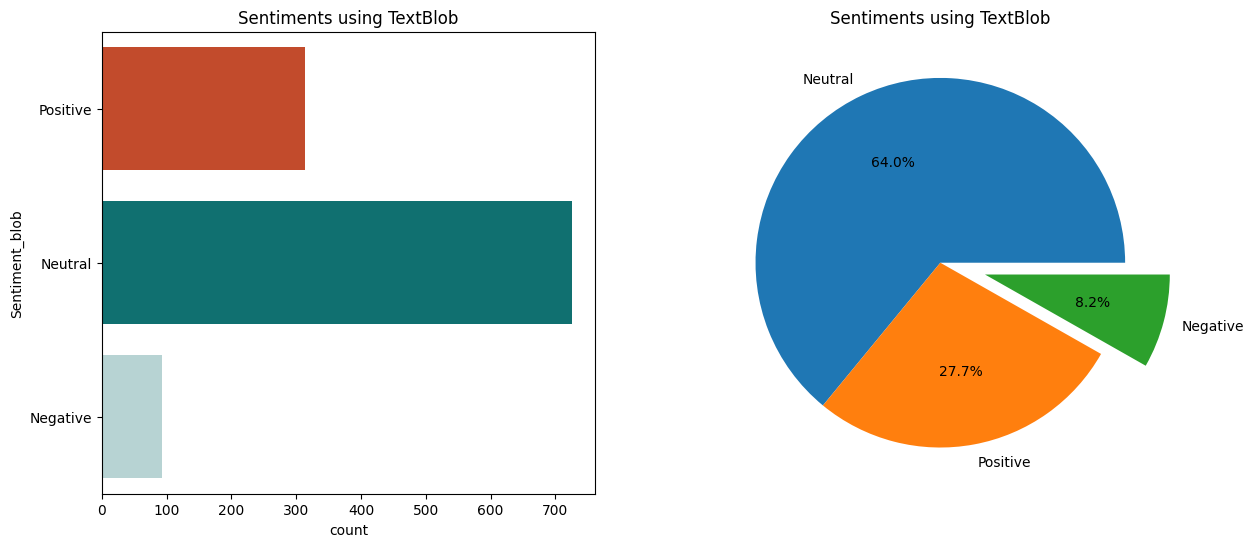

In [124]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Countplot
sns.countplot(y='Sentiment_blob', 
              data=df_reviews, 
              palette=['#db3d13',"#008080", '#b2d8d8'],
              ax=ax[0])
ax[0].set_title('Sentiments using TextBlob')

# Pie chart
ax[1].pie(df_reviews['Sentiment_blob'].value_counts().values, 
          labels = df_reviews['Sentiment_blob'].value_counts().index, 
          explode = (0, 0, 0.25), 
          autopct='%1.1f%%', 
          shadow=False)
ax[1].set_title('Sentiments using TextBlob')

plt.show()

### Insights:
* Polarity score is given between -1 to 1 and more close the value to -1, it indicates negative review and vice versa is true for positive value
* If we consider a threshold where any review with polarity greater than 0.2 is positive and less than -0.2 is negative, we are left with __64%__ reviews that lies in the __neutral__ zone when using __Text Blob__ where as __Vader__ gives __57% as Positive__ for the same thresholds.
* Neutral sentiment can have both proportions of positive and negative sentiments.
* Even though TextBlob gives neutral as highest, second highest is positive with 27.7%

* Text blob is very sensitive to the thresholds compared to VADER.

## We can conclude that overall sentiment is neutral to positive

__-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

# 3. Let's see sentiment wise words frequency. We will consider TextBlob sentiments.

In [47]:
def plot_most_common_words(df, column, sentiment_column,sentiment, n=10):
    df_senti = df[df[sentiment_column] == sentiment]
    text = ' '.join(df_senti[column])
    words = nltk.word_tokenize(text)
    new_words = [word for word in words if word not in stop_words]
    freqdist = nltk.FreqDist(new_words)
    most_common = freqdist.most_common(n)
    words, counts = zip(*most_common)
    
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.title(f'{sentiment} Sentiment wise word frequency')
    
    plt.xticks(rotation = 45)
    plt.show()

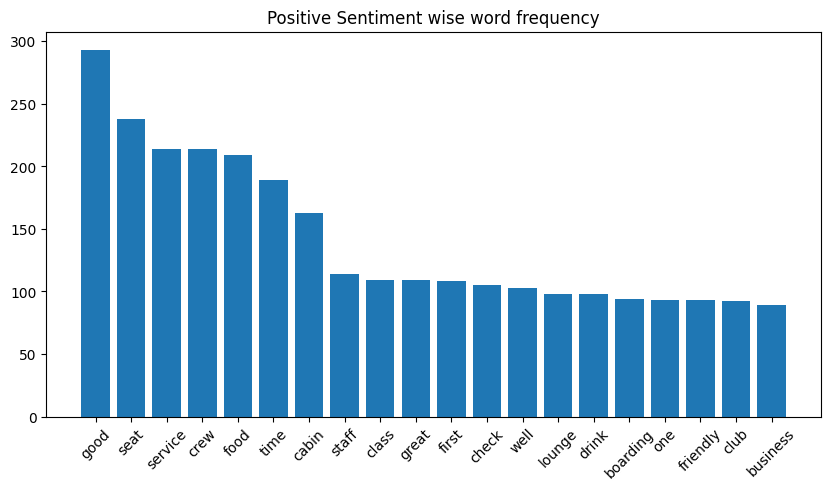

In [64]:
plot_most_common_words(df_reviews, 'Review_processed', 'sentiment_blob', 'Positive', n=20)

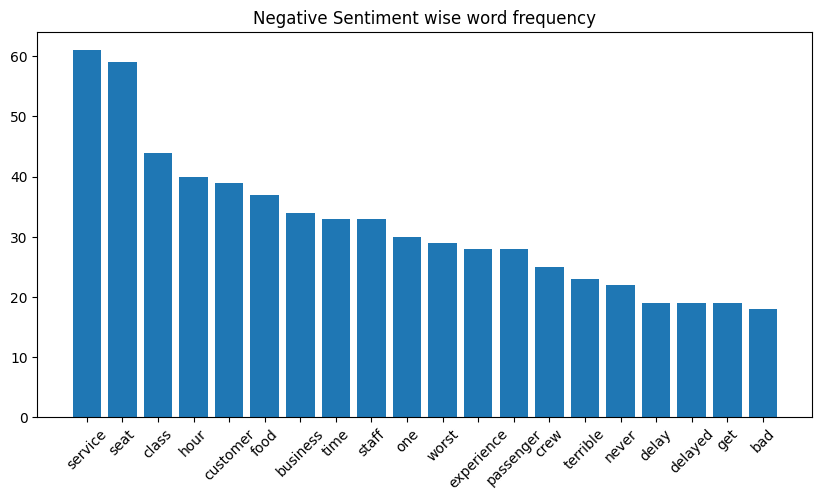

In [65]:
plot_most_common_words(df_reviews, 'Review_processed', 'Negative', n=20)


## Insights:
* Words like boarding, abin staff,lounge,crew were positive.
* In negative, we can see delay is used.
* Seat,service,food are very much used in both sentiments indicating mixed reactions.

# 4. We need to use n_grams for more clarity on sentiments.

In [66]:
all_reviews = ' '.join(df_verified_reviews['Review_processed'])

In [88]:
# Splitting reviews into words. Can use worde tokenize from nltk as well
words = all_reviews.split(" ")


#Removing stop words
new_words = [word for word in words if word not in stop_words]

In [55]:
from nltk.util import ngrams

def generate_ngrams_and_plot(words, n, top_n):
    # Generate n-grams
    n_grams = list(ngrams(words, n))
    
    # Count the frequency of each n-gram
    ngram_freq = FreqDist(n_grams)
    
    # Get the top n n-grams
    top_ngrams = ngram_freq.most_common(top_n)
    
    # Separate the n-grams and their frequencies
    ngrams_list, freqs = zip(*top_ngrams)  # renamed 'ngrams' to 'ngrams_list'
    
    # Convert n-grams to strings for plotting
    ngram_strings = [' '.join(gram) for gram in ngrams_list]
    
    # Plot the top n n-grams
    plt.figure(figsize=(10,5))
    plt.barh(ngram_strings[::-1], freqs[::-1])  # reverse the order of the bars
    plt.title(f'Top {top_n}  {n}-grams')
    plt.xticks(rotation=45)
    plt.show()




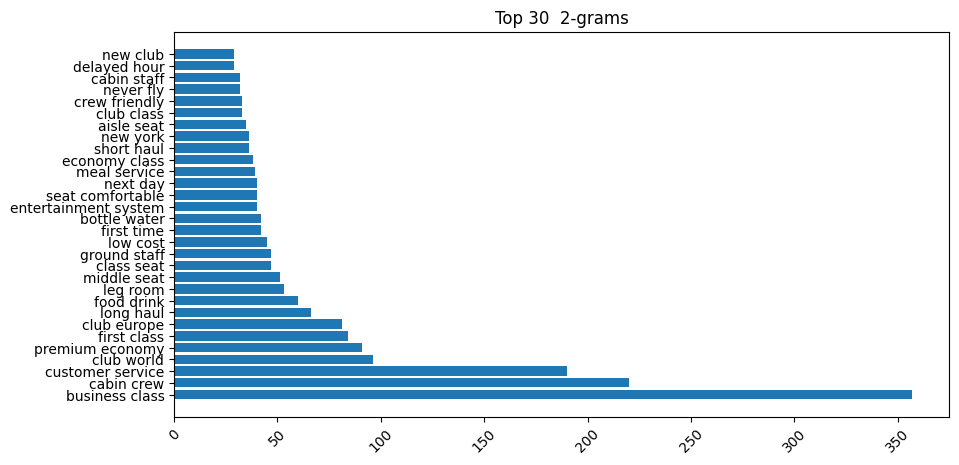

In [69]:
generate_ngrams_and_plot(new_words,2,30)

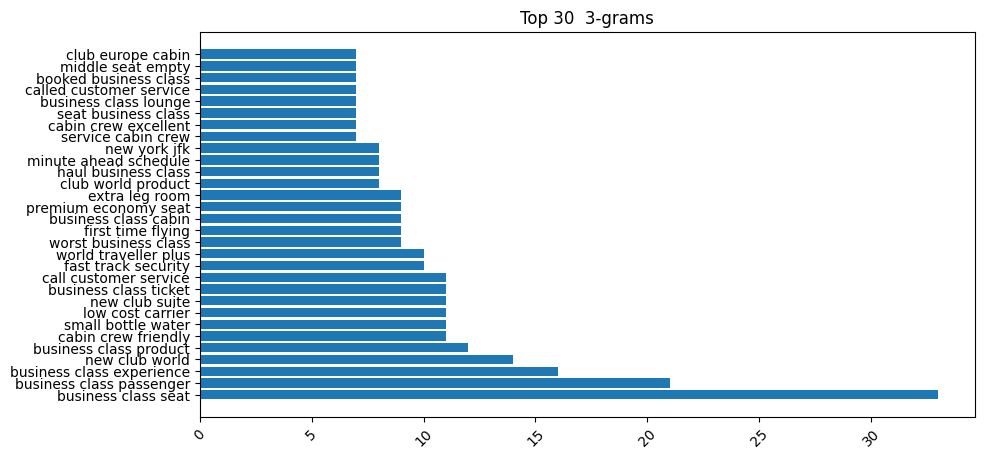

In [70]:
generate_ngrams_and_plot(new_words,3,30)

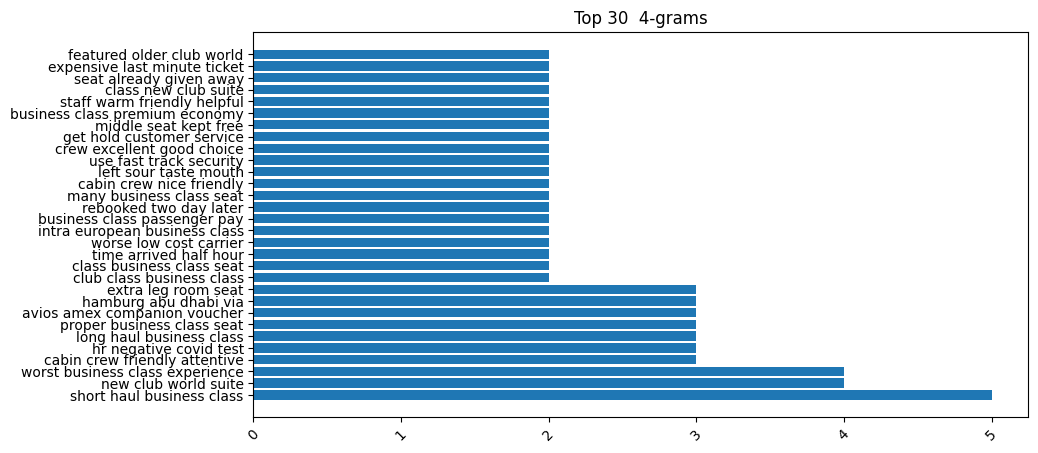

In [71]:
generate_ngrams_and_plot(new_words,4,30)

## Insights:

* __From 2-grams :__
    * We can see that cabin crew, customer service,leg room have been talked about and comfortable seat, friendly crew, low cost are some positive words. Where as delayed flight is also talked about.

* __From 3-gram :__
    * Words like worst_business_class, worst_traveller_plus,small_bottle_water indicate dissatisfaction.
    * even called_customer_service has appeared few times, indicating some sort of issue.
    * premium economy seat says the seats were good.
    * cabin crew has got excellent reviews.
    
* __From 4-gram :__
    * left sour taste mouth, worse low cost carrier, worst_business_class experience indicate negative sentiments regarding food and overall business class experience.
    * Even here cabin crew was given positive response


# 5. Analyzing DistilBERT finetuned dataset.

In [34]:
df_bert = pd.read_csv('huggingface_files/Sentiment_distilbert_chunks_verified_reviews.csv',index_col=0)
df_bert

,Review,Overall_rating,Seat Type,Recommended,verified,sentiment_value
0,First time using BA business class but we we...,9,Business Class,yes,True,1
1,My son and I flew to Geneva last Sunday for ...,1,Business Class,no,True,0
2,For the price paid (bought during a sale) it...,8,Business Class,yes,True,0
3,Flight left on time and arrived over half an...,6,Economy Class,no,True,0
4,"Very Poor Business class product, BA is not ...",2,Business Class,no,True,0
...,...,...,...,...,...,...
1127,London to Tel Aviv. I have been waiting on ...,1,Business Class,no,True,0
1128,I flew Premium Economy from London to Cape To...,3,Premium Economy,no,True,0
1129,Hong Kong to London before Christmas in Firs...,9,First Class,yes,True,1
1130,Dublin to Heathrow. BA gets worse and worse ...,1,Business Class,no,True,0


In [35]:
df_bert['sentiment'] = df_bert['sentiment_value'].apply(lambda x: 'Positive' if x==1 else 'Negative')

In [36]:
df_bert['sentiment'].value_counts()

Negative    815
Positive    317
Name: sentiment, dtype: int64

In [39]:
df_bert.head()

,Review,Overall_rating,Seat Type,Recommended,verified,sentiment_value,sentiment
0,First time using BA business class but we we...,9,Business Class,yes,True,1,Positive
1,My son and I flew to Geneva last Sunday for ...,1,Business Class,no,True,0,Negative
2,For the price paid (bought during a sale) it...,8,Business Class,yes,True,0,Negative
3,Flight left on time and arrived over half an...,6,Economy Class,no,True,0,Negative
4,"Very Poor Business class product, BA is not ...",2,Business Class,no,True,0,Negative


### Lets preprocess reviews for visualization purpose against sentiments.

In [43]:
df_bert['Review_preproc'] = df_bert['Review'].apply(preprocess)

In [45]:
df_bert.head()

,Review,Overall_rating,Seat Type,Recommended,verified,sentiment_value,sentiment,Review_preproc
0,First time using BA business class but we we...,9,Business Class,yes,True,1,Positive,first time using business class pleased servic...
1,My son and I flew to Geneva last Sunday for ...,1,Business Class,no,True,0,Negative,son flew geneva last sunday skiing holiday le ...
2,For the price paid (bought during a sale) it...,8,Business Class,yes,True,0,Negative,price paid bought sale decent experience altho...
3,Flight left on time and arrived over half an...,6,Economy Class,no,True,0,Negative,left time arrived half hour earlier scheduled ...
4,"Very Poor Business class product, BA is not ...",2,Business Class,no,True,0,Negative,poor business class product close leader ever ...


In [65]:
df_bert_positive = df_bert.loc[df_bert['sentiment']=='Positive']
df_bert_negative = df_bert.loc[df_bert['sentiment']=='Negative']


In [68]:
all_reviews_positive = ' '.join(df_bert_positive['Review_preproc'])
all_reviews_negative = ' '.join(df_bert_negative['Review_preproc'])

# Splitting reviews into words. Can use worde tokenize from nltk as well
words_positive = all_reviews_positive.split(" ")
words_negative = all_reviews_negative.split(" ")

* __N grams for positive sentiments__

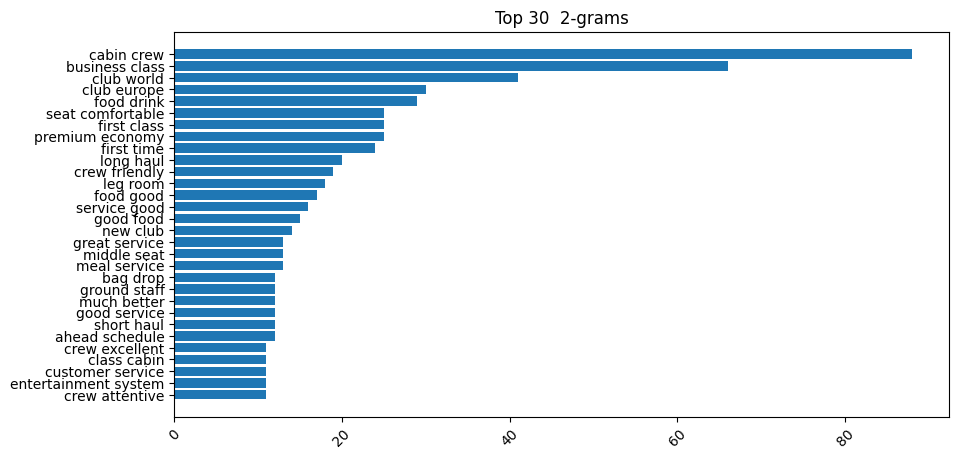

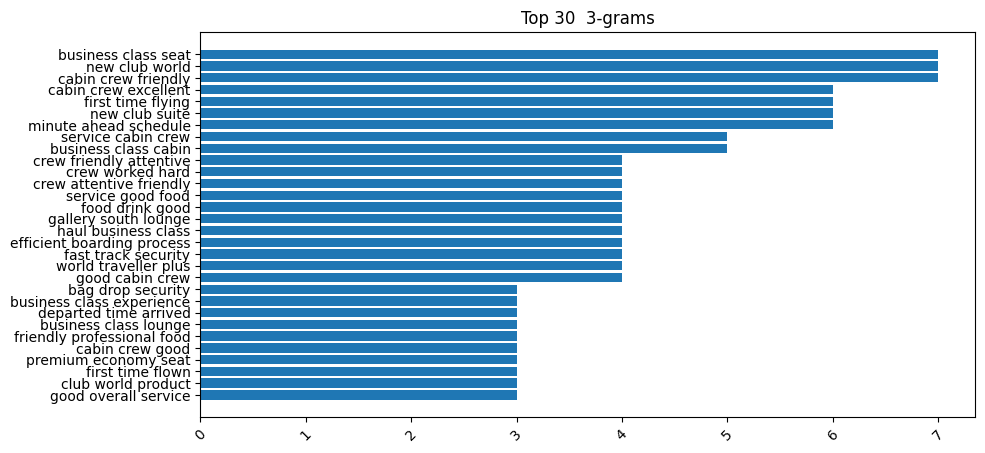

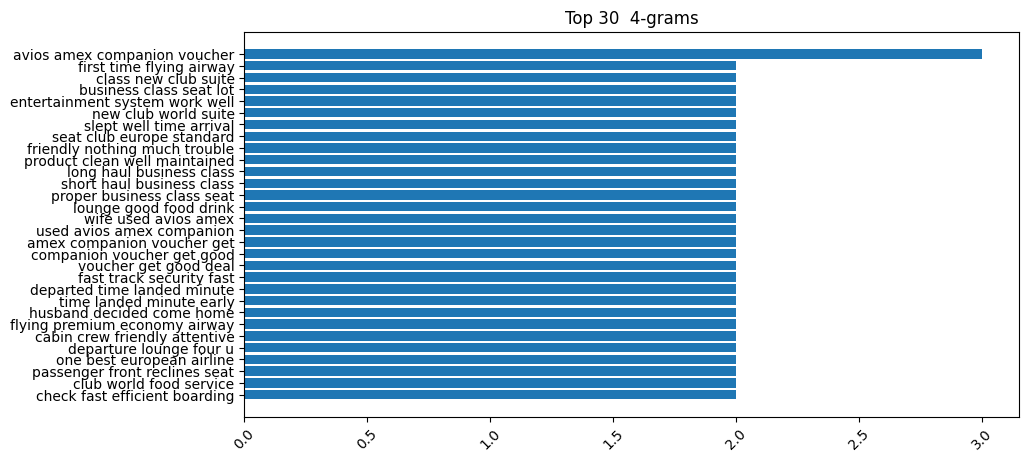

In [73]:
generate_ngrams_and_plot(words_positive,2,30)
generate_ngrams_and_plot(words_positive,3,30)
generate_ngrams_and_plot(words_positive,4,30)


## Insights - Positive :

* __From 2-grams :__
    * We can see that cabin crew, seat comfortable, good food, crew friendly,food drink ,service good ,leg room have been talked about.

* __From 3-gram :__
    * Cabin crew friendly, cabin crew excellent, crew worked hard, service good food, efficient boarding process, and business class seat are few positive things.
    
* __From 4-gram :__
    * Entertainment system, companion voucer good deal, clean well maintained are few word.
    
## Overall we can say that cabin crew service and behaviour, food drink, boarding process, seat are positives


* __N grams for negative sentiments__

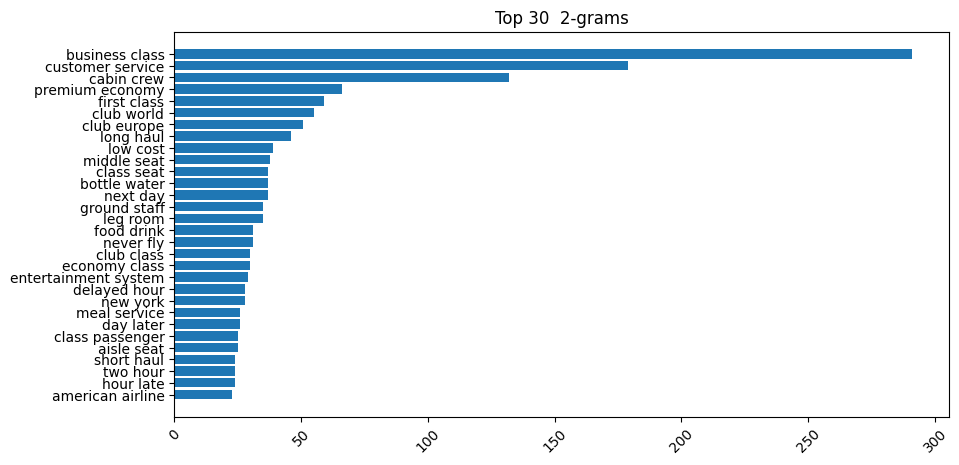

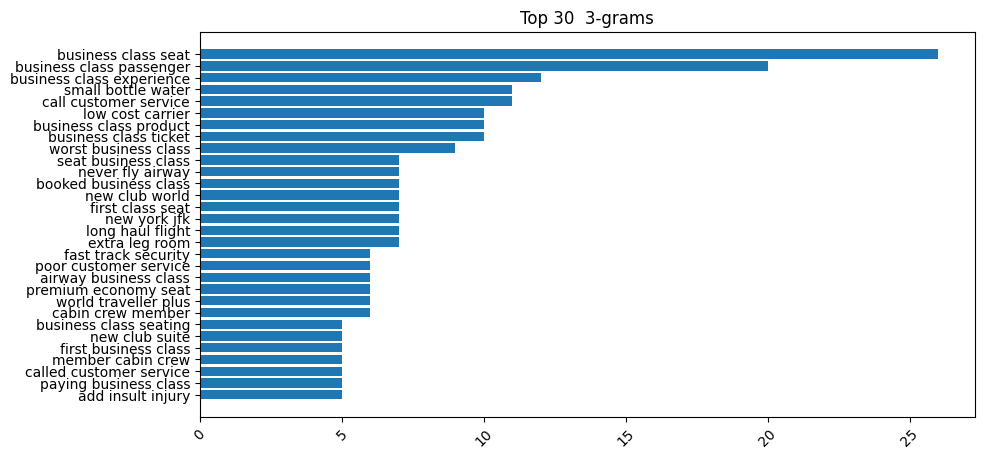

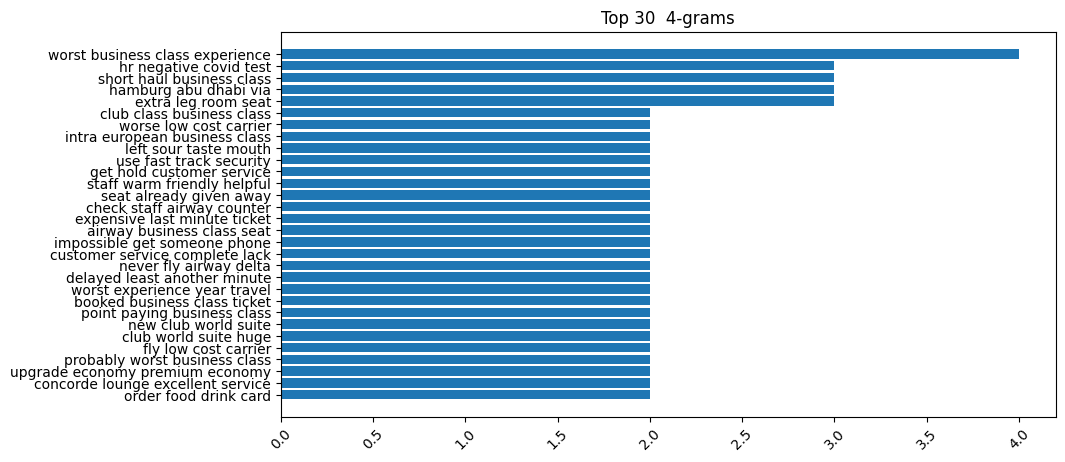

In [74]:
generate_ngrams_and_plot(words_negative,2,30)
generate_ngrams_and_plot(words_negative,3,30)
generate_ngrams_and_plot(words_negative,4,30)


## Insights:

* __From 2-grams :__
    * We can see that cabin crew, customer service,leg room have been talked about.

* __From 3-gram :__
    * business class seat, business class experience, poor customer service,.
    
* __From 4-gram :__
    * left sour taste mouth, worse low cost carrier, worst_business_class experience indicate negative sentiments regarding food and overall business class experience.

## Overall, business class experience,customer service have been negative things.

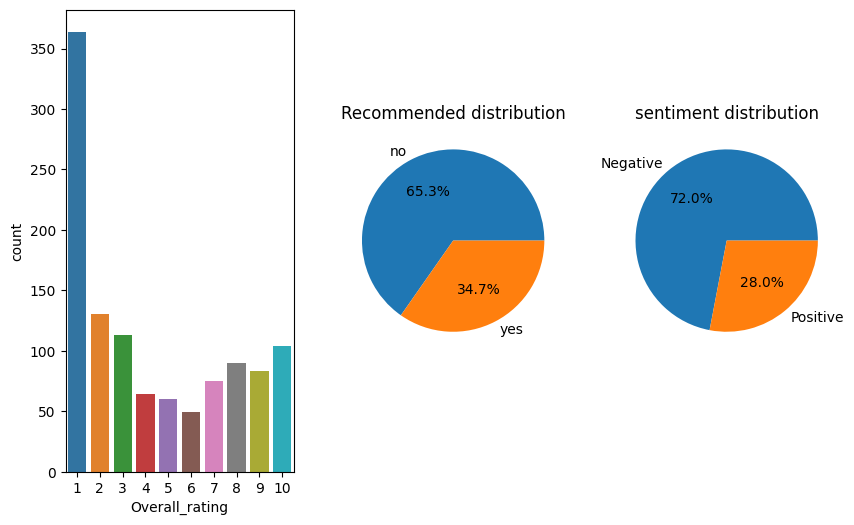

In [91]:


fig, ax = plt.subplots(1, 3, figsize=(10, 6))
columns = ['Overall_rating', 'Recommended', 'sentiment']

for i, col in enumerate(columns):
    if col == 'Overall_rating':
        sns.countplot(x=col, data=df_bert, ax=ax[i])
    else:
        values = df_bert[col].value_counts().values
        labels = df_bert[col].value_counts().index
        ax[i].pie(values, labels=labels, autopct='%1.1f%%')
        ax[i].set_title(f'{col} distribution')

plt.show()


## Insights:
* From the barplots and pie charts, we can conclude that overall sentiment of British Airways is NOT GOOD.



# Conclusion:

__After testing VADER,TEXTBLOB and Finetuned DistilBERT transformer, it is being concluded that the DistilBERT transformer aligns well with the overall rating and recommendation data. VADER and TEXTBLOB gives neutral to positive sentiment depending on the thresholds set__